# Multimodal Rag

1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

Steps:
1. Download video from YouTube, process and store it.

2. Build Multi-Modal index and vector store for both texts and images.

3. Retrieve relevant images and context, use both to augment the prompt.

4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [1]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv

In [2]:
# Load environment variables from .env file
load_dotenv()

# Retrieve the OPENAI_API_KEY
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# print(OPENAI_API_KEY)




In [3]:
os.getcwd()

'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch'

In [4]:
# Define the base path where you want to store everything
base_path = Path(os.getcwd())

# Define the subdirectories you need to create
video_url="https://youtu.be/3dhcmeOTZ_Q"
output_video_path = base_path / "video_data"
output_folder = base_path / "mixed_data"
output_audio_path = base_path / "mixed_data/output_audio.wav"

# Create the directories if they don't already exist
output_video_path.mkdir(parents=True, exist_ok=True)
output_folder.mkdir(parents=True, exist_ok=True)

# Define the filepath for the input video
filepath = output_video_path / "input_vid.mp4"

# Print the paths to verify
print(f"Output Video Path: {output_video_path}")
print(f"Output Folder: {output_folder}")
print(f"Output Audio Path: {output_audio_path}")
print(f"Filepath: {filepath}")

Output Video Path: d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\video_data
Output Folder: d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\mixed_data
Output Audio Path: d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\mixed_data\output_audio.wav
Filepath: d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\video_data\input_vid.mp4


In [5]:
def plot_images(image_path):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)
            
            plt.subplot(2, 2, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            
            images_shown += 1
            if images_shown >= 5:
                break

In [6]:
def download_video(video_url, output_path):
    yt = YouTube(video_url)
    metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
    yt.streams.get_highest_resolution().download(output_path=output_path, filename="input_vid.mp4")# filename=yt.title+".mp4") #
    return metadata

In [7]:
from moviepy.editor import VideoFileClip
# Function to convert video to images
def video_to_images(video_path, output_path):
    clip = VideoFileClip(str(video_path))  # Convert Path to string
    clip.write_images_sequence(
        os.path.join(str(output_path), "frame_%04d.png"), fps=0.2
    )

In [8]:
def video_to_audio(video_path, output_audio_path):
    clip = VideoFileClip(str(video_path))  # Convert Path to string
    audio=clip.audio
    audio.write_audiofile(str(output_audio_path))
    return audio
    
    

In [9]:
def audio_to_text(audio_path):
    recogniser = sr.Recognizer()
    audio = sr.AudioFile(str(audio_path))
    
    with audio as source:
        audio_data = recogniser.record(source)
        try:
            # recognise the speech
            text = recogniser.recognize_whisper(audio_data)
        except sr.UnknownValueError:
            print("Speech Recognition could not understand audio")
    return text

In [10]:
# import speech_recognition as sr
# from pathlib import Path

# def audio_to_text(audio_path, output_folder):
#     # Initialize the recognizer
#     recogniser = sr.Recognizer()
    
#     # Ensure the output folder exists
#     output_folder_path = Path(output_folder)
#     output_folder_path.mkdir(parents=True, exist_ok=True)
    
#     # Load the audio file
#     audio = sr.AudioFile(str(audio_path))
    
#     with audio as source:
#         # Adjust for ambient noise and record
#         recogniser.adjust_for_ambient_noise(source)
#         audio_data = recogniser.record(source)
        
#         try:
#             # Use Google's web speech API to recognize the speech
#             text = recogniser.recognize_google(audio_data)
#             print("Recognized text:", text)
            
#             # Write to file
#             output_file_path = output_folder_path / "recognized_text.txt"
#             with open(output_file_path, 'w') as file:
#                 file.write(text)
#             print(f"Text successfully written to {output_file_path}")
                
#         except sr.UnknownValueError:
#             print("Speech Recognition could not understand audio")
#             text = "Speech Recognition could not understand audio"
        
#         except sr.RequestError as e:
#             print(f"Could not request results from Google Speech Recognition service; {e}")
#             text = f"Error: {e}"
        
#         # Write any error messages or blank responses to the file as well
#         if text not in ["", "Speech Recognition could not understand audio"]:
#             with open(output_file_path, 'w') as file:
#                 file.write(text)
    
#     return text





In [11]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [12]:
output_video_path

WindowsPath('d:/iNeuron/GenAI/GenerativeAI/Rag_from_scratch/video_data')

In [13]:
metadata_vid = download_video(video_url, output_video_path)
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7829}

In [14]:
filepath

WindowsPath('d:/iNeuron/GenAI/GenerativeAI/Rag_from_scratch/video_data/input_vid.mp4')

In [15]:
output_folder

WindowsPath('d:/iNeuron/GenAI/GenerativeAI/Rag_from_scratch/mixed_data')

In [16]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\mixed_data\frame_%04d.png.


Moviepy - Done writing frames d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\mixed_data\frame_%04d.png.


In [17]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\mixed_data\output_audio.wav


MoviePy - Done.


In [18]:
text_data=audio_to_text(output_audio_path)

In [19]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [20]:
# Write to file
output_file_path = output_folder / "output_text.txt"
with open(output_file_path, 'w') as file:
    file.write(text_data)
print(f"Text successfully written to {output_file_path}")

Text successfully written to d:\iNeuron\GenAI\GenerativeAI\Rag_from_scratch\mixed_data\output_text.txt


In [21]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


# Multimodel

In [22]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

from llama_index.vector_stores.lancedb import LanceDBVectorStore

from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

import json

In [23]:
text_store = LanceDBVectorStore(uri="lancedb", table_name="text_collection")
image_store = LanceDBVectorStore(uri="lancedb", table_name="imgage_collection")

In [24]:
storage_context = StorageContext.from_defaults(vector_store=text_store, image_store=image_store)

In [25]:
output_folder = str(output_folder)
output_folder

'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data'

In [26]:
documents = SimpleDirectoryReader(output_folder).load_data()


In [27]:
documents

[ImageDocument(id_='7694b320-8624-427f-bbfc-feec1387d424', embedding=None, metadata={'file_path': 'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0000.png', 'file_name': 'frame_0000.png', 'file_type': 'image/png', 'file_size': 2759, 'creation_date': '2024-05-27', 'last_modified_date': '2024-05-27'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='d:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='33adccca-77c1-4525-a7eb-15ad90eaefa5', embedding=None, meta

In [28]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

In [29]:
retriever_engine = index.as_retriever(imilarity_top_k=5, image_similarity_top_k=5)

## RAG

In [30]:
metadata_str = json.dumps(metadata_vid)

In [31]:
metadata_str

'{"Author": "3-Minute Data Science", "Title": "Linear Regression in 3 Minutes", "Views": 7829}'

In [32]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [33]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [50]:
# query_str="what is a O'Reilly platform.?"
query_str="what is linear regression in machine learning.?"

In [51]:
retrieval_results=retriever_engine.retrieve(query_str)

In [52]:
retrieval_results

[NodeWithScore(node=TextNode(id_='d39ccbdb-6531-43e2-9e58-99df9c79ae3c', embedding=[-0.010950897820293903, 0.0043984828516840935, 0.0034818416461348534, -0.008385696448385715, -0.002033688360825181, -0.006583782844245434, 0.001850708620622754, 0.010191095992922783, -0.030670877546072006, -0.04756774380803108, -0.009250057861208916, 0.024048756808042526, -0.0038478008937090635, 0.031116999685764313, 0.0072146267630159855, -0.012024378404021263, 0.02558230049908161, 0.010574482381343842, 0.04305075854063034, -0.016687745228409767, -0.03159100562334061, 0.009291881695389748, -0.015321497805416584, -0.014596549794077873, -0.014429253526031971, -0.012456558644771576, 0.03354278579354286, -0.017775166779756546, 0.00792563334107399, -0.0017827447736635804, 0.010128360241651535, -0.0016694716177880764, -0.007117037661373615, -0.01951783150434494, -0.008671493269503117, -0.019280828535556793, 0.009933182038366795, -0.0010447268141433597, 0.0252616498619318, -0.012812062166631222, 0.022682508453

In [53]:
retrieved_image=[]
retrieved_text=[]

In [54]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)




**Node ID:** d39ccbdb-6531-43e2-9e58-99df9c79ae3c<br>**Similarity:** 0.7687583565711975<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [55]:
retrieved_image

['d:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0003.png',
 'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0038.png',
 'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0028.png']

In [56]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [57]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [58]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 62e90754-d5e2-40e5-99b5-3eeeb03e21d8<br>**Similarity:** 0.7687583565711975<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [59]:
output_folder

'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data'

In [60]:
img

['d:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0003.png',
 'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0038.png',
 'd:\\iNeuron\\GenAI\\GenerativeAI\\Rag_from_scratch\\mixed_data\\frame_0028.png']

In [61]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

In [62]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

In [63]:
context_str = "".join(txt)
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

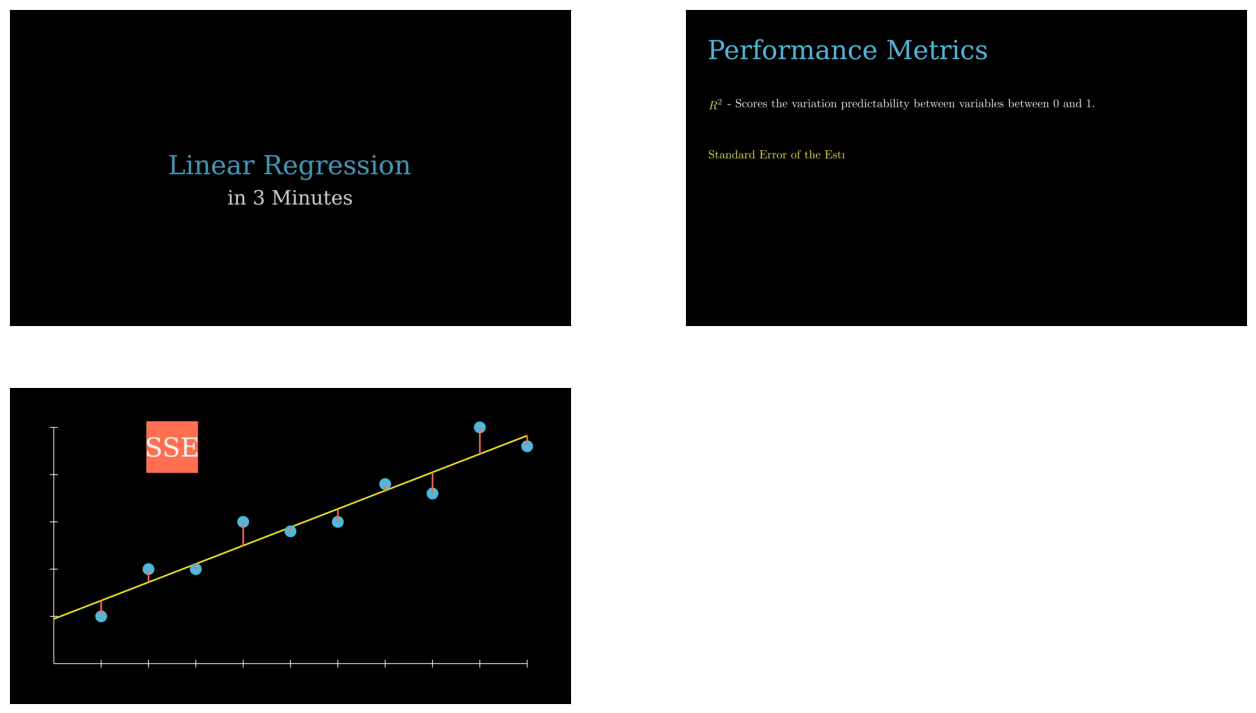

In [64]:
plot_images(img)

In [65]:
qa_tmpl_str2

'Given the provided information, including relevant images and retrieved context from the video,     accurately and precisely answer the query without any additional prior knowledge.\n---------------------\nMetadata for video: {metadata_str} \n---------------------\nQuery: {query_str}\nAnswer: '

In [66]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [67]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_KEY, max_new_tokens=1500)

In [68]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

In [69]:
pprint(result.text)

('Linear regression in machine learning is a statistical method used for '
 'predictive modeling. It establishes a relationship between a dependent '
 'variable (Y) and one or more independent variables (X) using a linear '
 'equation to predict the outcome. The linear equation can be represented as Y '
 '= a + bX + e, where Y is the dependent variable, X is the independent '
 'variable, a is the y-intercept, b is the slope of the line, and e is the '
 'error term.\n'
 '\n'
 'The goal of linear regression is to find the best-fitting straight line '
 'through the data points that minimizes the sum of the squared differences '
 'between the observed values and the values predicted by the linear model. '
 'This is known as the least squares method. The performance of a linear '
 'regression model can be evaluated using metrics such as R-squared, which '
 'measures the proportion of variance in the dependent variable that can be '
 'explained by the independent variables, and the standard 

In [70]:
result2=openai_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)

O'Reilly can refer to several things, but in the context of the images you've provided, which seem to be related to educational content on linear regression and performance metrics, O'Reilly likely refers to O'Reilly Media, Inc. This is a learning company that publishes books, produces tech conferences, and provides an online learning platform with content on technology and business topics. They are known for their distinctive animal covers on their technical books and for producing high-quality material that is used by professionals and students in the tech industry to learn about programming, data science, and other technical subjects.


In [71]:
result3=openai_mm_llm.complete(
    prompt="just tell me what you are seeing over the pacific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)

#real time system

#sattalites

#just tell me what you are seeing over the pecific ocean?

("It seems there might be a misunderstanding. The images you've provided do "
 'not show views over the Pacific Ocean. Instead, they are related to the '
 'topic of linear regression, which is a statistical method used to model the '
 'relationship between a dependent variable and one or more independent '
 'variables.\n'
 '\n'
 'The first image is a title slide that says "Linear Regression in 3 Minutes," '
 'suggesting it might be the opening slide of a short educational video or '
 'presentation on the topic.\n'
 '\n'
 'The second image is a slide titled "Performance Metrics," with text that '
 'begins to describe R-squared (R²), which is a statistical measure of how '
 'close the data are to the fitted regression line. It also mentions "Standard '
 'Error of the Est," which seems to be cut off, but likely refers to the '
 'standard error of the estimate, a measure of the accuracy of predictions '
 'made with a regression line.\n'
 '\n'
 'The third image is a scatter plot with a yell